In [ ]:
from google.colab import files

# Paso 1: Subir los archivos desde la computadora
uploaded = files.upload()

Saving winequality.names to winequality.names
Saving winequality-red.csv to winequality-red.csv
Saving winequality-white.csv to winequality-white.csv


# **Datos Sin Balanceo**

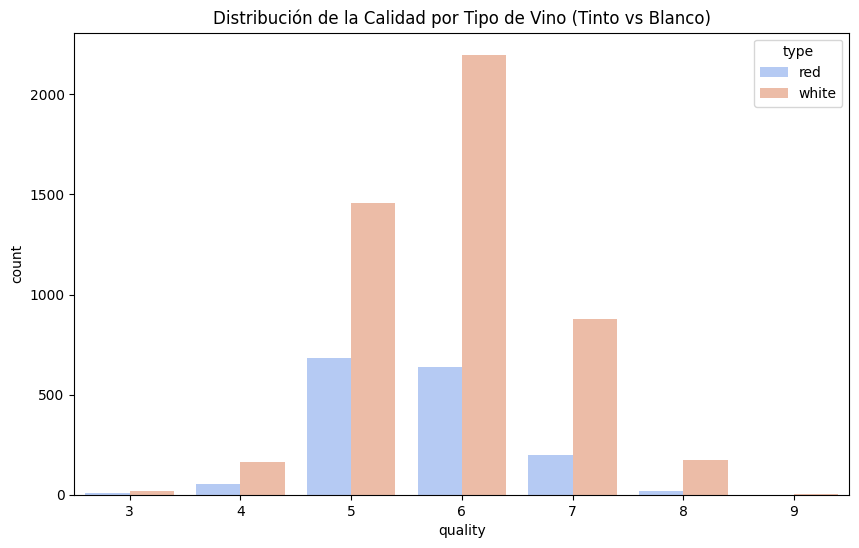

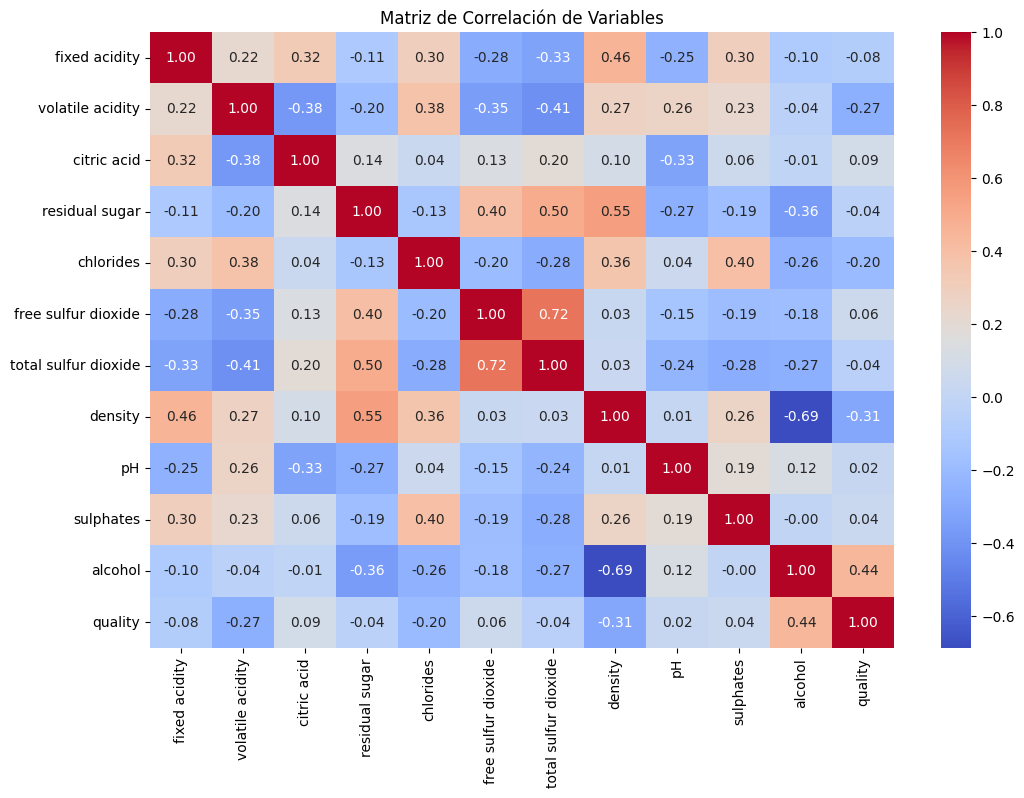

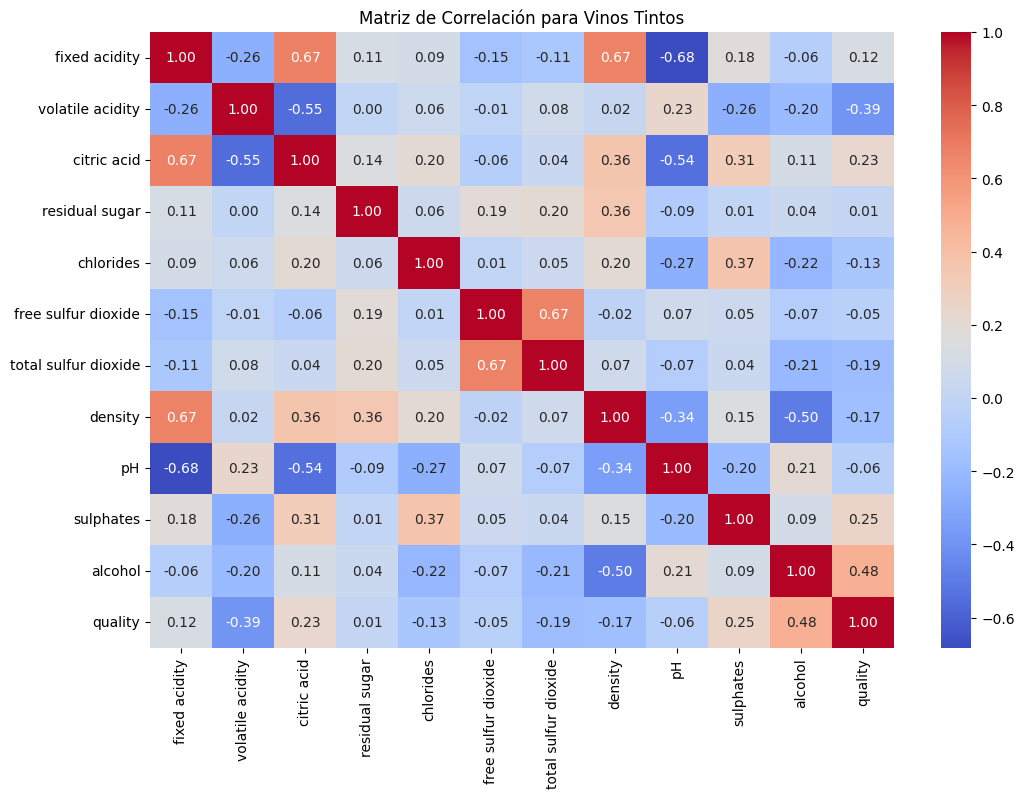

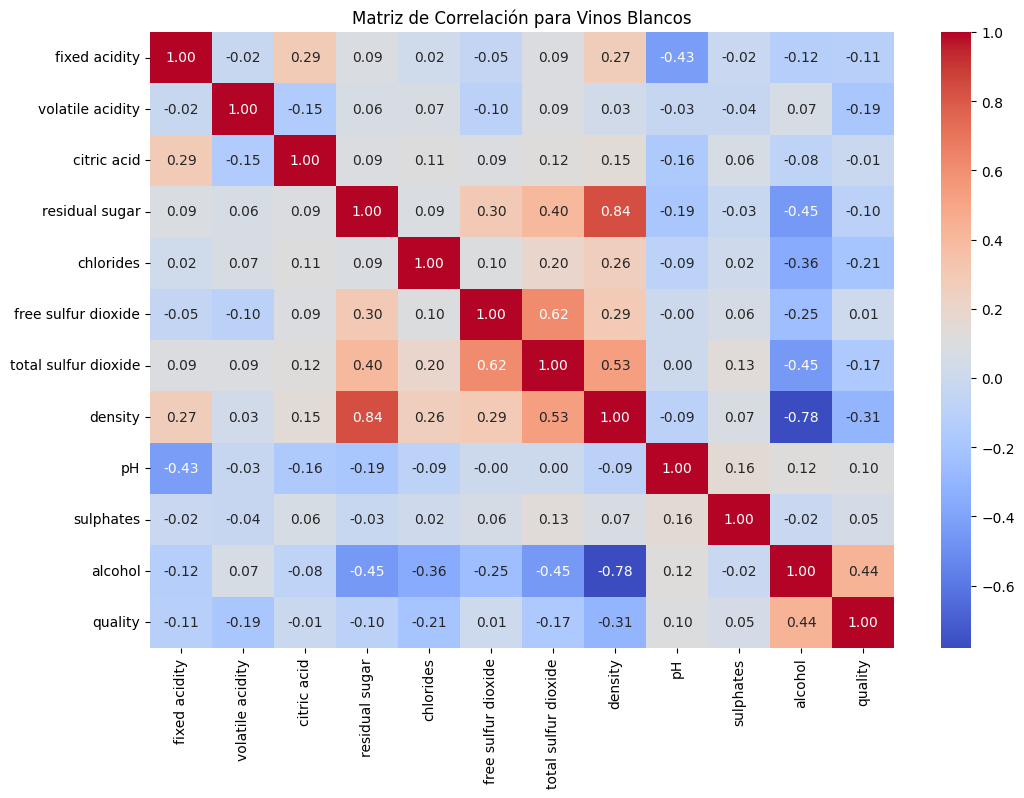

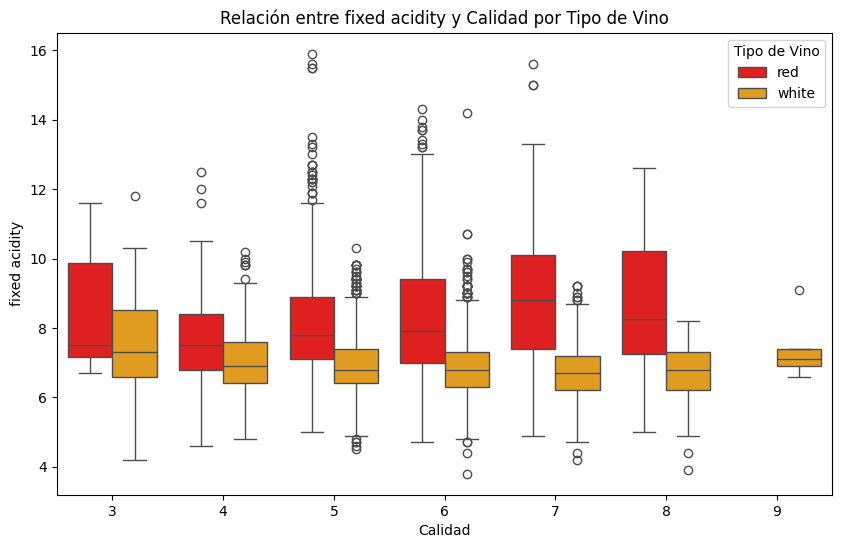

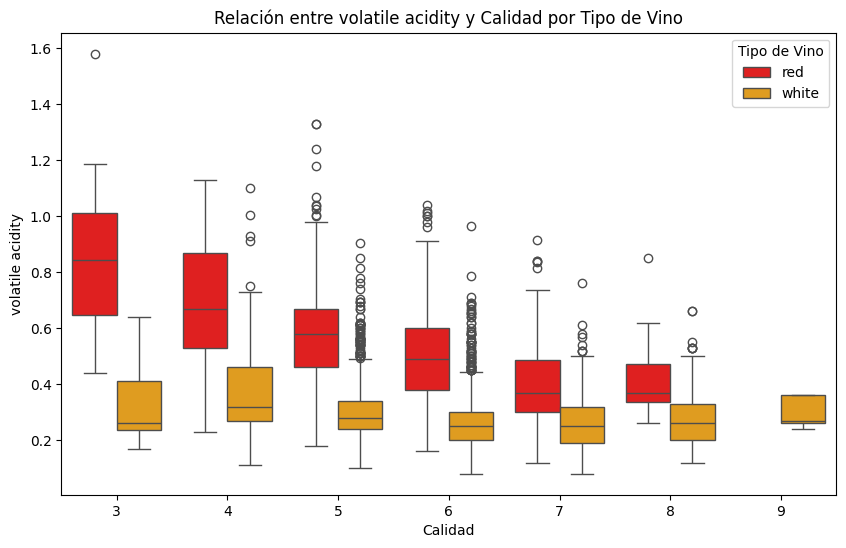

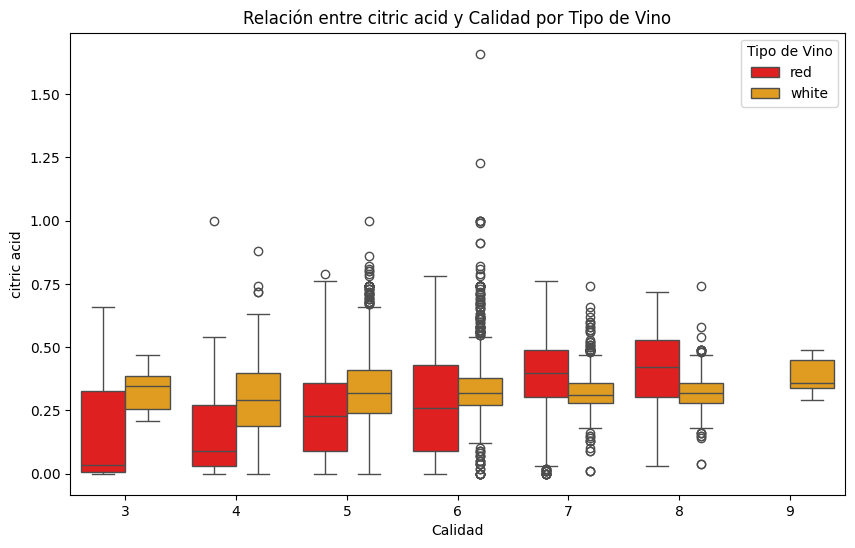

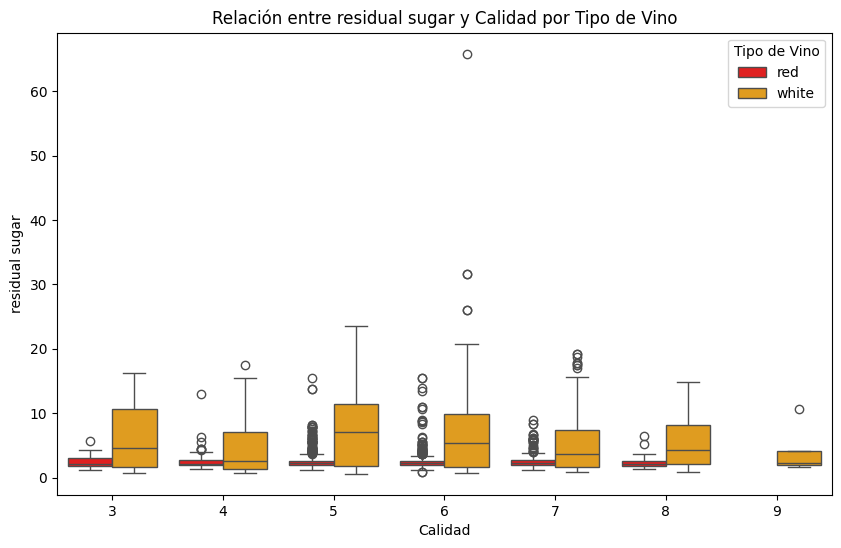

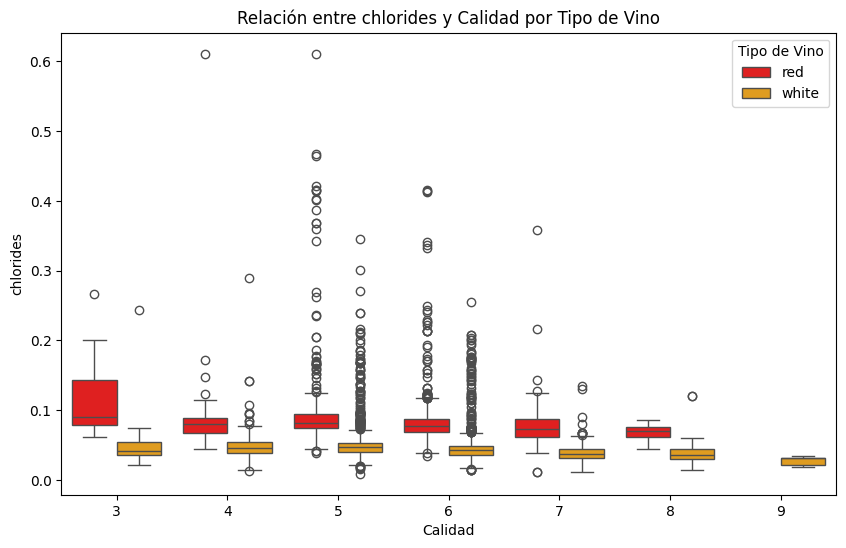

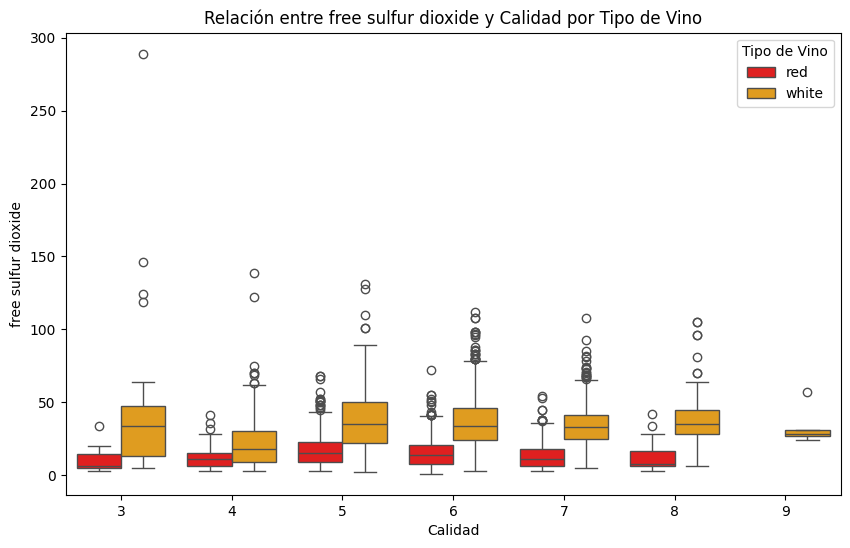

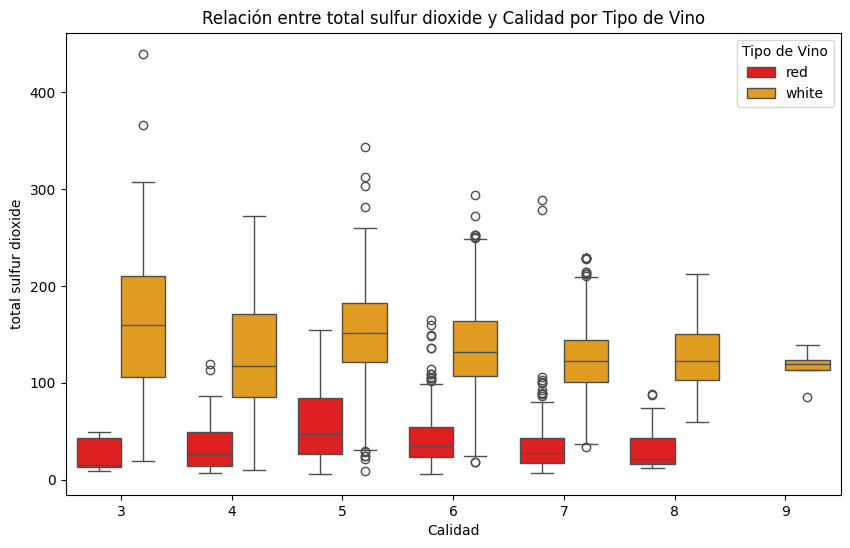

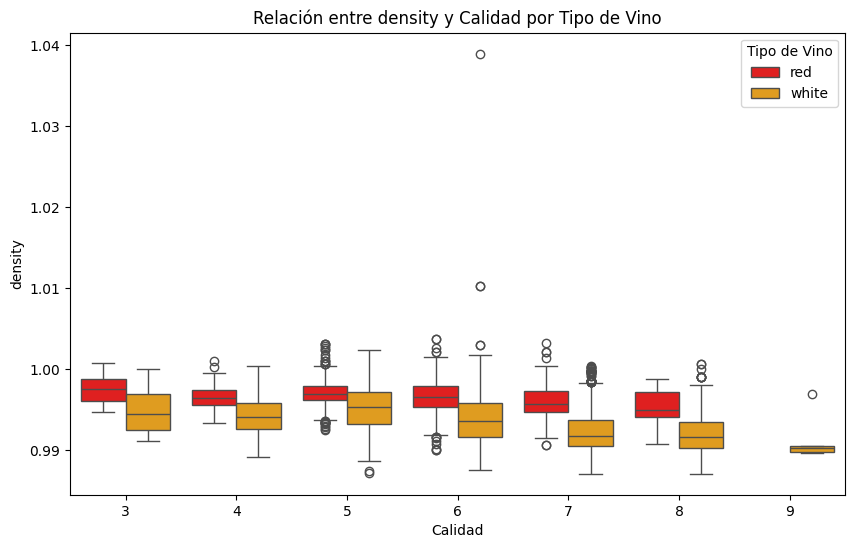

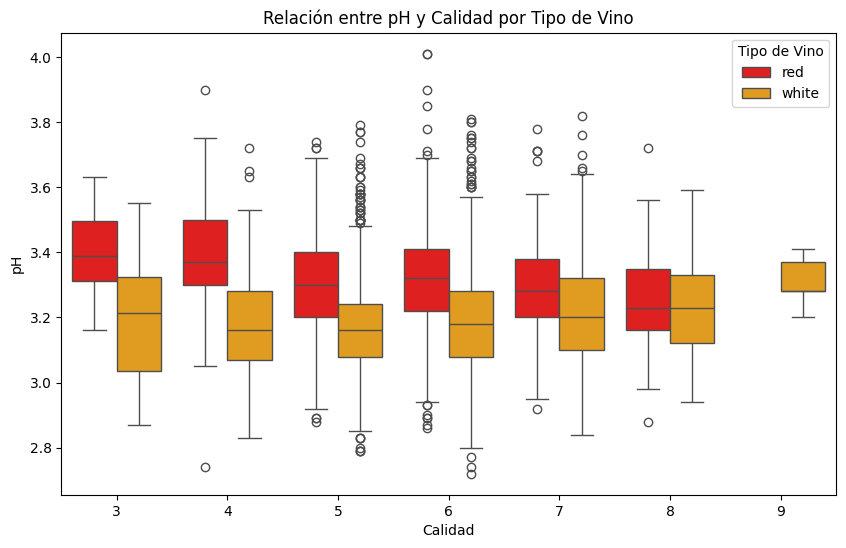

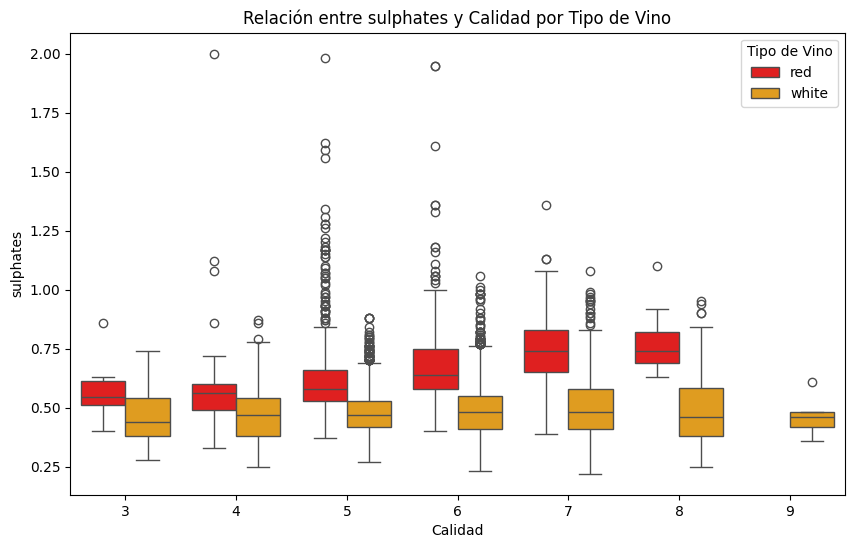

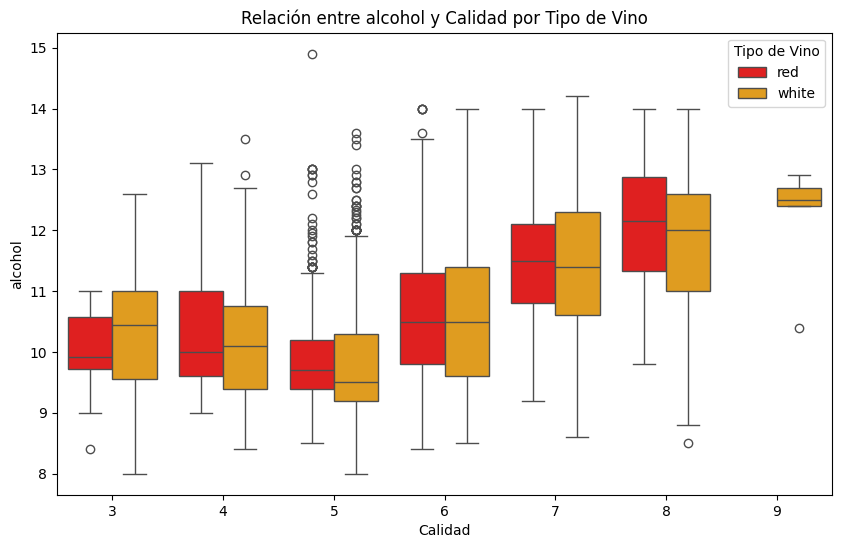

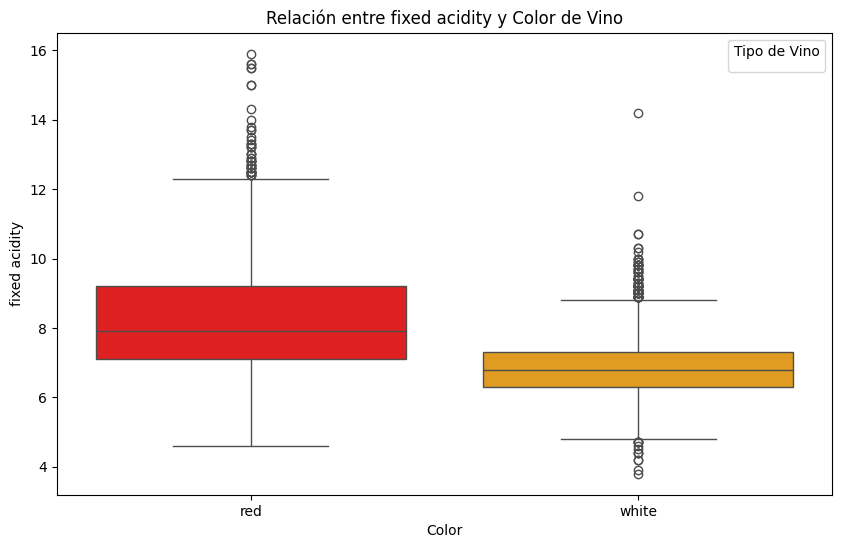

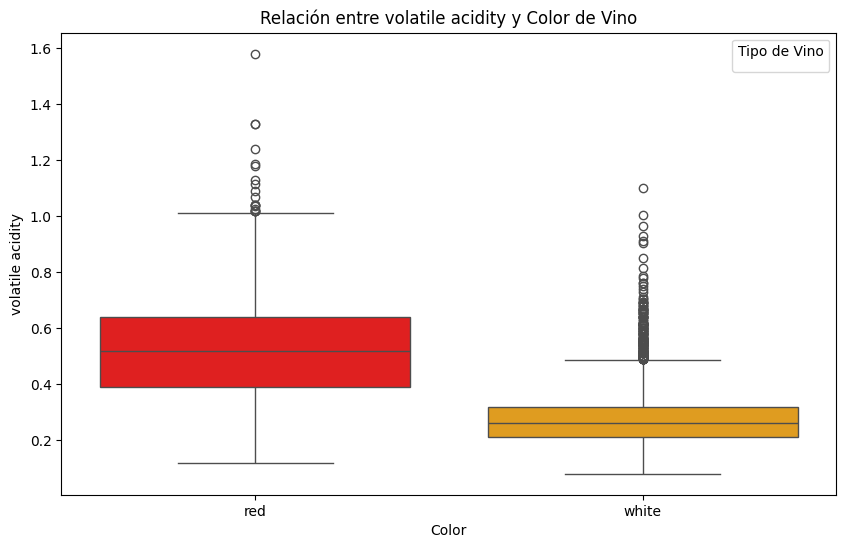

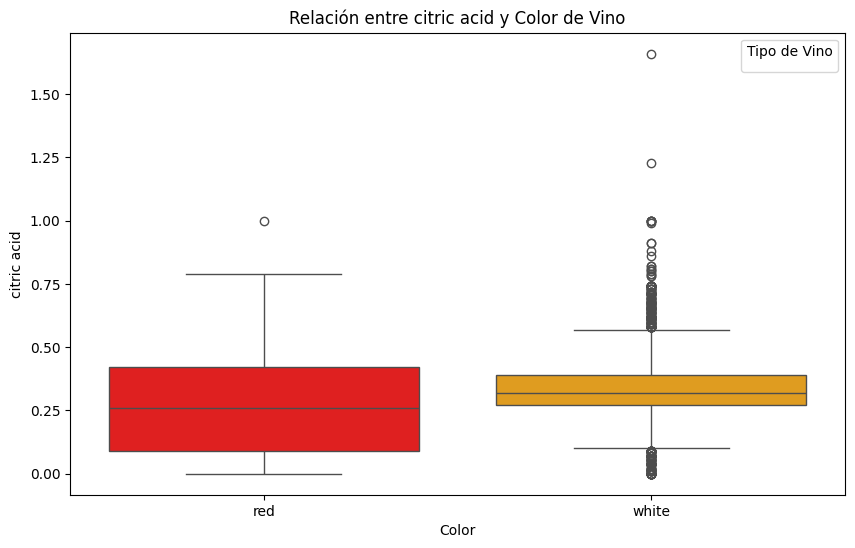

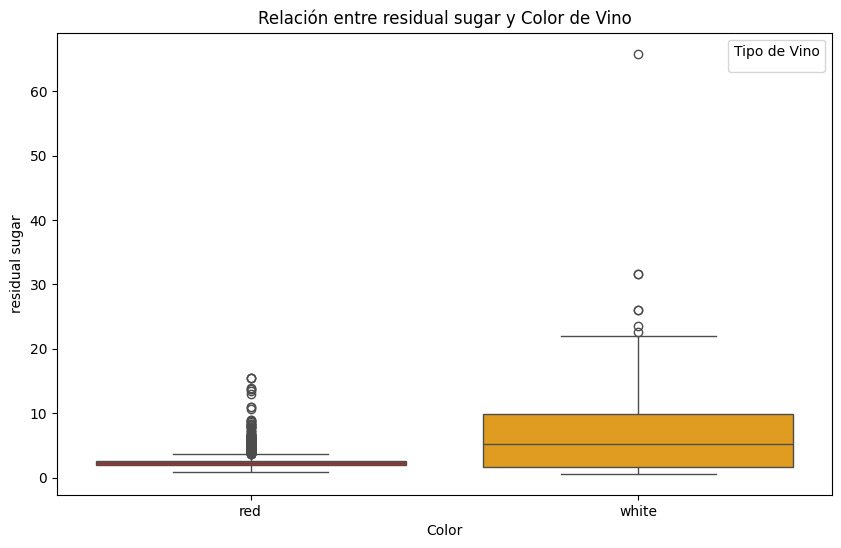

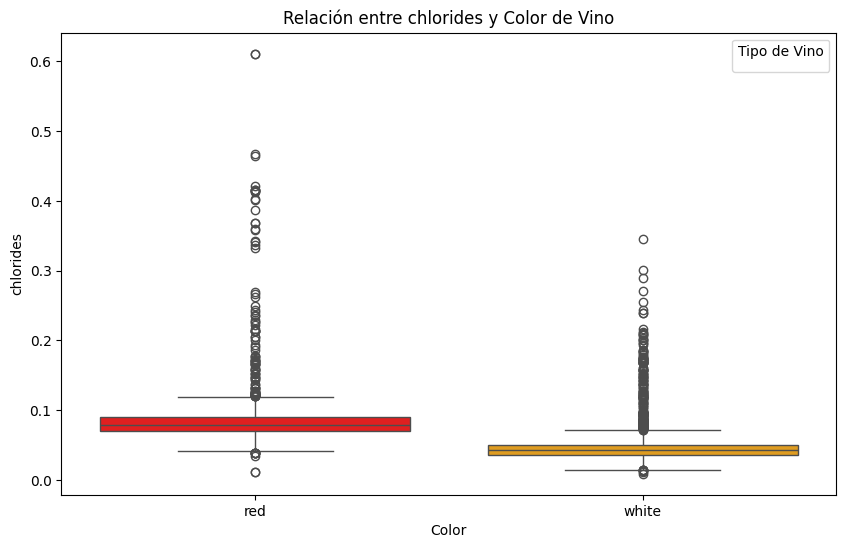

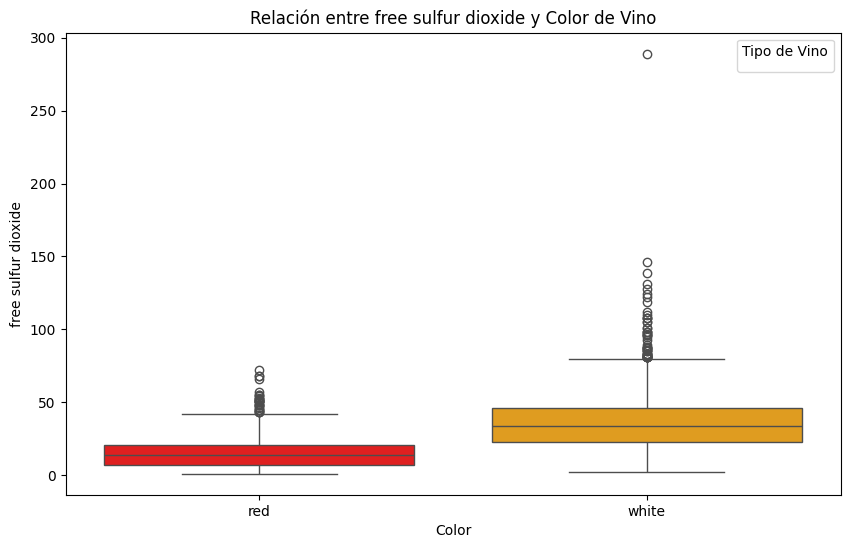

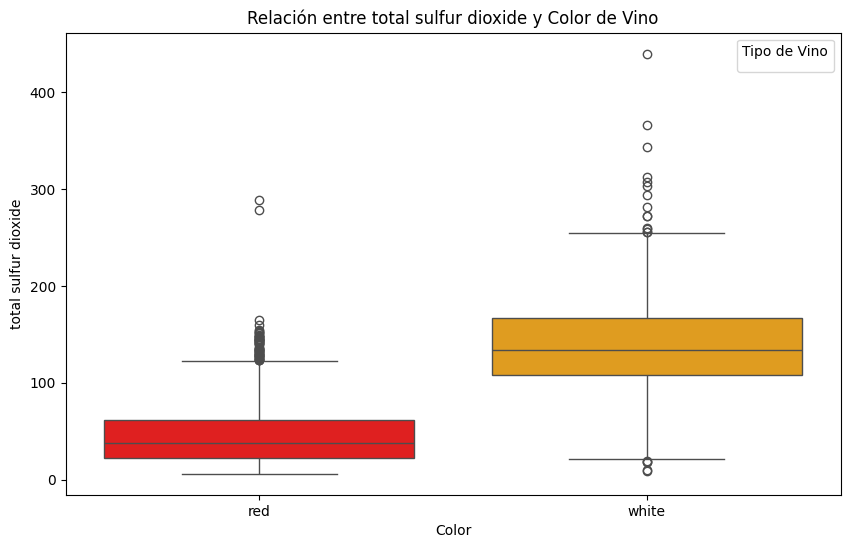

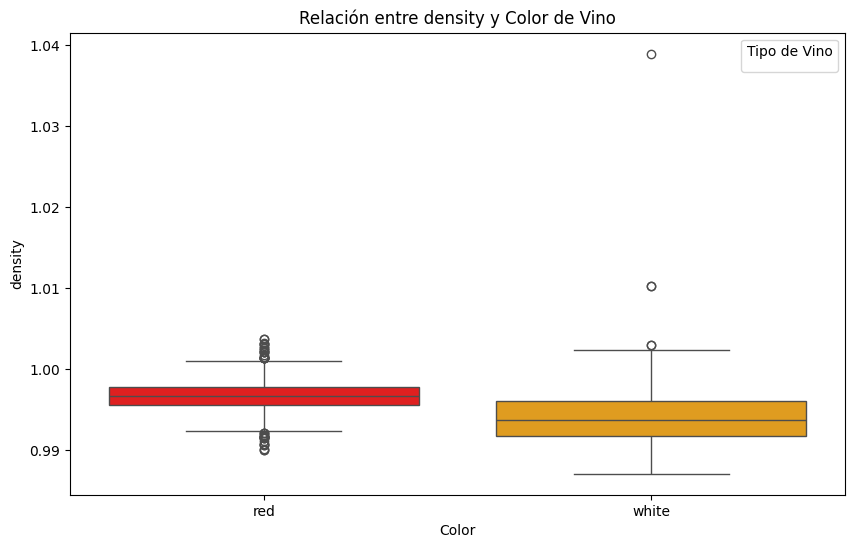

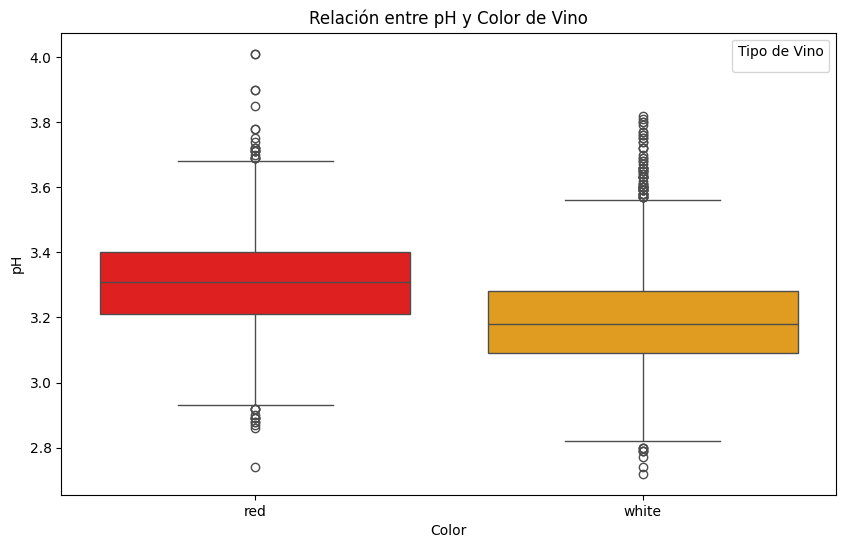

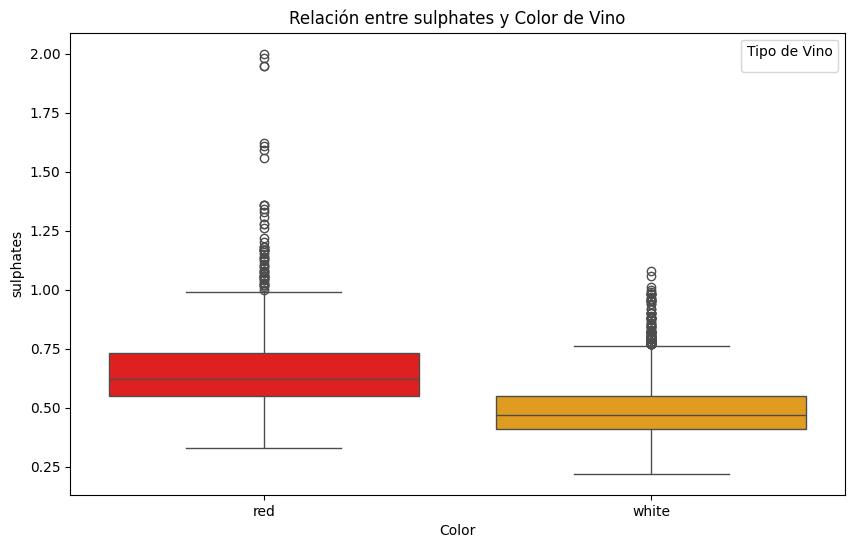

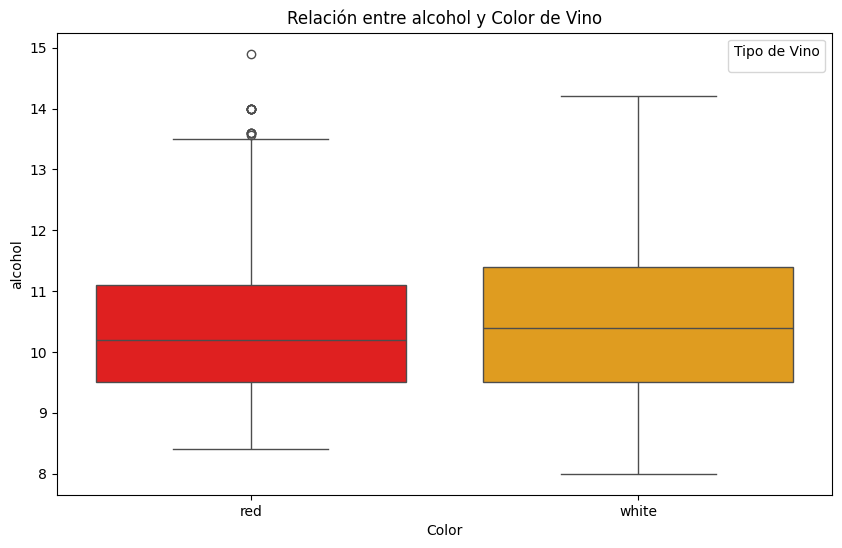

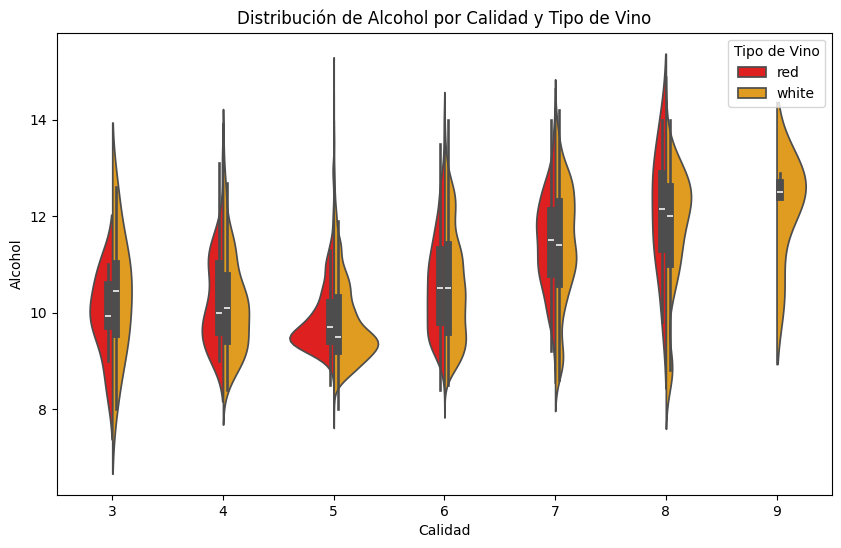

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D


# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Paso 2: Análisis Exploratorio Antes del Balanceo

# Distribución de la calidad por tipo de vino
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df_wine, palette='coolwarm')
plt.title('Distribución de la Calidad por Tipo de Vino (Tinto vs Blanco)')
plt.show()

# Matriz de correlación para todas las variables excepto 'type'
plt.figure(figsize=(12, 8))
correlation_matrix = df_wine.drop(columns='type').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables')
plt.show()

# Matriz de Correlación para Vinos Tintos
plt.figure(figsize=(12, 8))
correlation_matrix_red = df_red.drop(columns='type').corr()
sns.heatmap(correlation_matrix_red, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Tintos')
plt.show()

# Matriz de Correlación para Vinos Blancos
plt.figure(figsize=(12, 8))
correlation_matrix_white = df_white.drop(columns='type').corr()
sns.heatmap(correlation_matrix_white, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación para Vinos Blancos')
plt.show()

# Gráficos de comparación por tipo de vino para variables clave

for col in df_wine.drop(columns=['quality', 'type']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='quality', y=col, hue='type', data=df_wine, palette=['red', 'orange'])
    plt.title(f'Relación entre {col} y Calidad por Tipo de Vino')
    plt.xlabel('Calidad')
    plt.ylabel(col)
    plt.legend(title='Tipo de Vino')
    plt.show()

for col in df_wine.drop(columns=['quality', 'type']).columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='type', y=col, hue='type', data=df_wine, palette=['red', 'orange'])
    plt.title(f'Relación entre {col} y Color de Vino')
    plt.xlabel('Color')
    plt.ylabel(col)
    plt.legend(title='Tipo de Vino')
    plt.show()

# Gráfico interactivo en 3D para ver si ciertas variables son relevantes

fig3dacid = px.scatter_3d(df_wine,
                    x='volatile acidity',
                    y='fixed acidity',
                    z='quality',
                    color='type',
                    title='3D Scatter Plot of Volatile acidity, fixed acidity, and Quality', color_discrete_sequence=['#FF6347', '#FFFF00'])
fig3dacid.show()
#Ambas útiles para color

fig3d = px.scatter_3d(df_wine,
                    x='sulphates',
                    y='density',
                    z='quality',
                    color='type',
                    title='3D Scatter Plot of Sulphates, Density, and Quality', color_discrete_sequence=['#FF6347', '#FFFF00'])
fig3d.show()
#Sulfatos útiles para color, densidad no.

fig3d2 = px.scatter_3d(df_wine,
                    x='pH',
                    y='volatile acidity',
                    z='quality',
                    color='type',
                    title='3D Scatter Plot of pH, Volatile acidity, and Quality', color_discrete_sequence=['#FF6347', '#FFFF00'])
fig3d2.show()

variables_clave = ['alcohol', 'pH', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide']

# Visualización adicional: Comparación de la distribución de alcohol por tipo de vino y calidad
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='alcohol', hue='type', data=df_wine, split=True, palette=['red', 'orange'])
plt.title('Distribución de Alcohol por Calidad y Tipo de Vino')
plt.xlabel('Calidad')
plt.ylabel('Alcohol')
plt.legend(title='Tipo de Vino')
plt.show()


# **Análisis Enfocado en la Calidad del Vino con Balanceo**

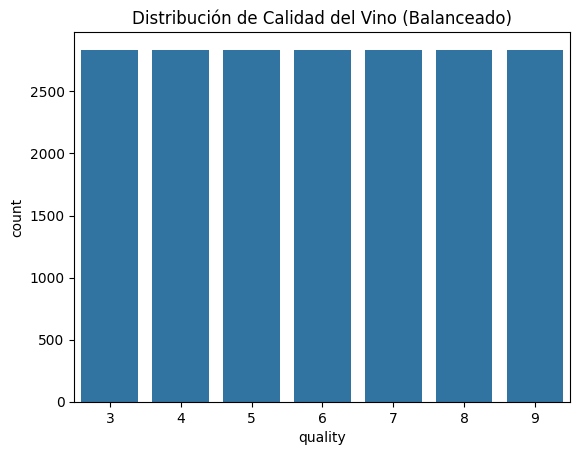

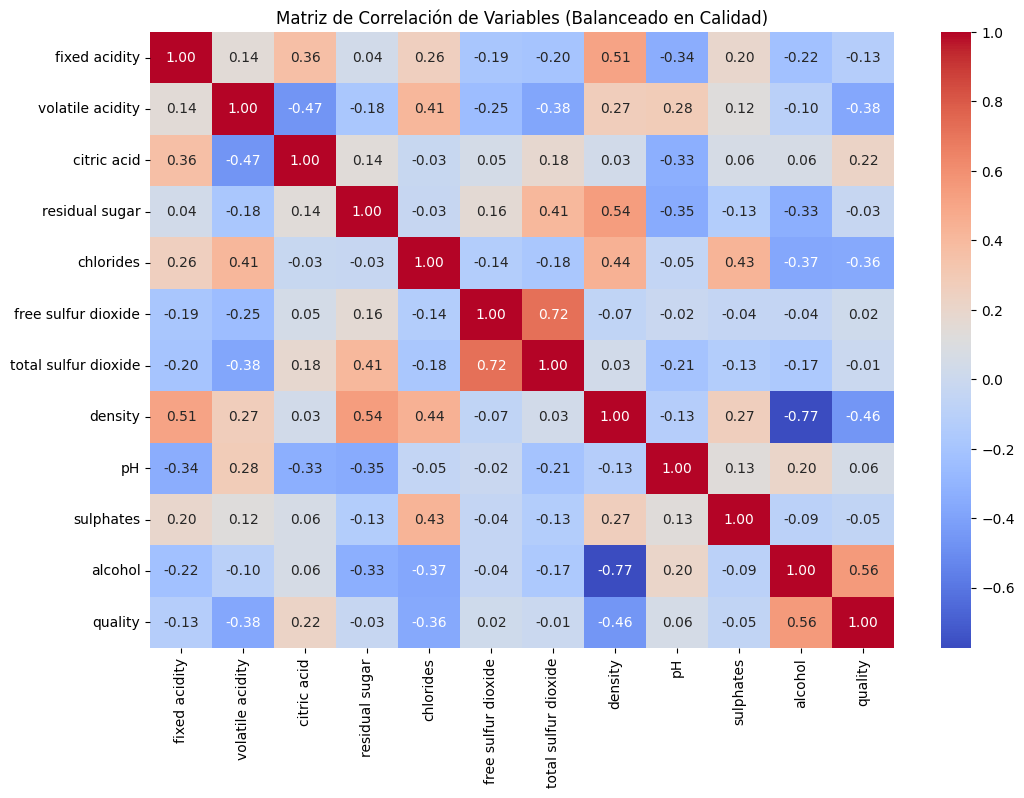

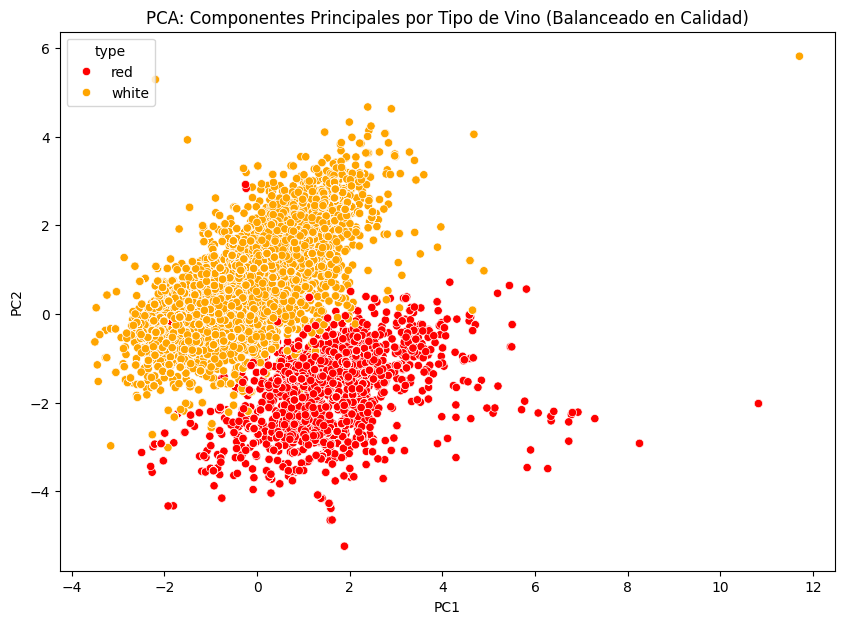

Varianza explicada por el primer componente: 0.25
Varianza explicada por el segundo componente: 0.23
Varianza explicada acumulada: [0.25374258 0.48643158]
                           PC1       PC2
fixed acidity         0.378862  0.009634
volatile acidity      0.219821 -0.405902
citric acid           0.053015  0.293401
residual sugar        0.214077  0.401009
chlorides             0.405313 -0.175820
free sulfur dioxide  -0.126921  0.366590
total sulfur dioxide -0.076046  0.502455
density               0.545215  0.101222
pH                   -0.161775 -0.335389
sulphates             0.240436 -0.154312
alcohol              -0.438283 -0.154766
Evaluación del modelo de Regresión Logística para predicción de la calidad del vino
[[ 92 191  95  40  23  75  56]
 [ 69 237 105  22  87  15  32]
 [ 75 201 204  29  23  13  20]
 [ 64 148 110  45  58  50  95]
 [ 24 100  56  27  87  63 214]
 [ 16  53  63   9  43  81 335]
 [  0   0   0 105   0   0 421]]
              precision    recall  f1-score   suppo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Paso 2: Balanceo del dataset enfocado en la calidad
ros = RandomOverSampler(random_state=42)
X = df_wine.drop(columns=['quality'])  # Incluye 'type' para la clasificación
y = df_wine['quality']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_wine_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['quality'])], axis=1)

# Visualización de la distribución de la calidad después del balanceo
sns.countplot(x='quality', data=df_wine_resampled)
plt.title('Distribución de Calidad del Vino (Balanceado)')
plt.show()

# Paso 3: Análisis exploratorio y gráficos
plt.figure(figsize=(12, 8))
correlation_matrix = df_wine_resampled.drop(columns='type').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de Variables (Balanceado en Calidad)')
plt.show()

# Paso 4: Análisis de PCA para identificar componentes clave
features = df_wine_resampled.drop(columns=['type', 'quality'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['type'] = df_wine_resampled['type'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='type', data=pca_df, palette={'red': 'red', 'white': 'orange'})
plt.title('PCA: Componentes Principales por Tipo de Vino (Balanceado en Calidad)')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')

cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(f'Varianza explicada acumulada: {cumulative_variance}')

# Paso 5: Selección de variables clave para el modelo

#Modelo PCA
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)
print(loadings)

variables_seleccionadas = ['density', 'alcohol', 'chlorides', 'residual sugar', 'total sulfur dioxide']
X_model = df_wine_resampled[variables_seleccionadas]
y_model = df_wine_resampled['quality']

# Modelo graficos
variables_clave = ['alcohol', 'pH', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide']
X_modelG = df_wine_resampled[variables_clave]
y_modelG = df_wine_resampled['quality']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=42)

X_trainG, X_testG, y_trainG, y_testG = train_test_split(X_modelG, y_modelG, test_size=0.2, random_state=42)

# Modelo de Regresión Logística (con más iteraciones y un solver diferente)
logreg = LogisticRegression(max_iter=10000, solver='saga', random_state=42)

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

logreg.fit(X_trainG, y_trainG)
y_pred_logregG = logreg.predict(X_testG)

# Modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_model.fit(X_trainG, y_trainG)
y_pred_rfG = rf_model.predict(X_testG)

# Evaluación de modelos
print("Evaluación del modelo de Regresión Logística para predicción de la calidad del vino")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("Evaluación del modelo de Regresión Logística para predicción de la calidad del vino con gráficos")
print(confusion_matrix(y_testG, y_pred_logregG))
print(classification_report(y_testG, y_pred_logregG))

print("Evaluación del modelo de Random Forest para predicción de la calidad del vino")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("Evaluación del modelo de Random Forest para predicción de la calidad del vino con gráficos")
print(confusion_matrix(y_testG, y_pred_rfG))
print(classification_report(y_testG, y_pred_rfG))


# **Análisis Enfocado en el Color del Vino**

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None
       fixed acidity  volatile acidity  citric acid  residual s

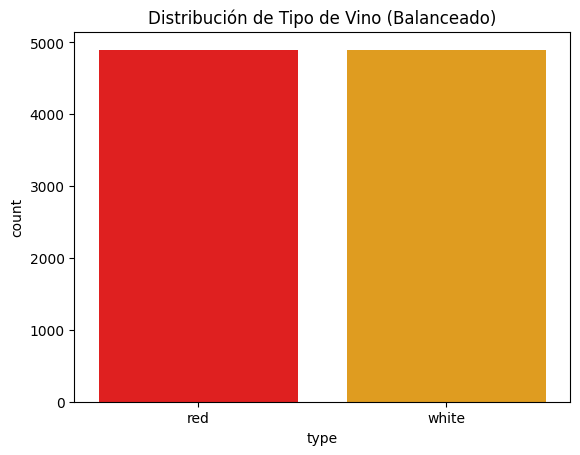

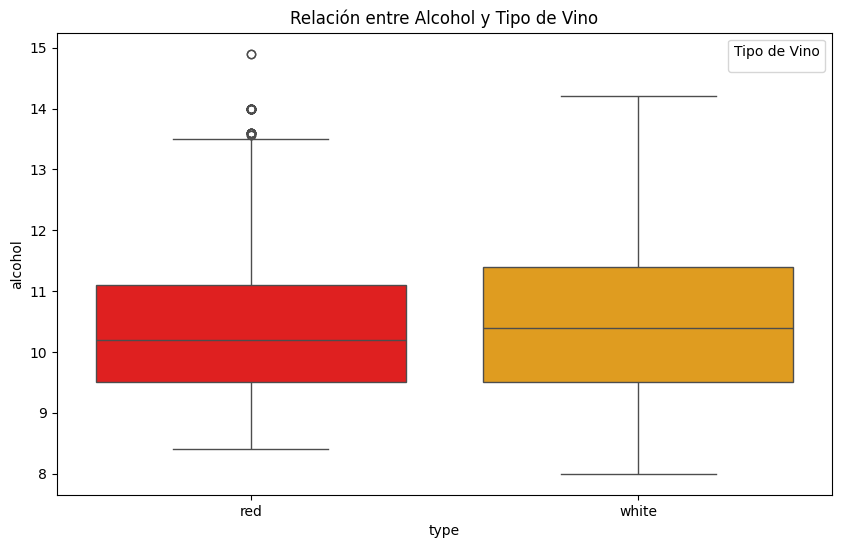

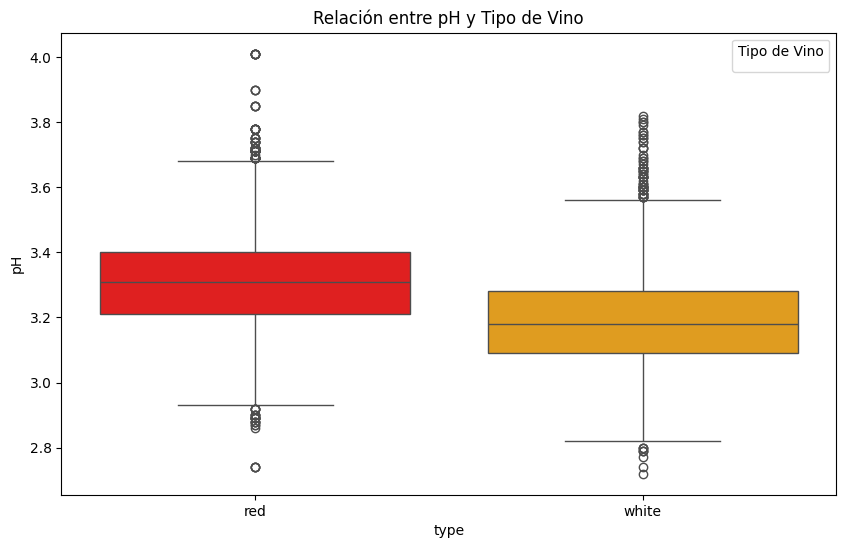

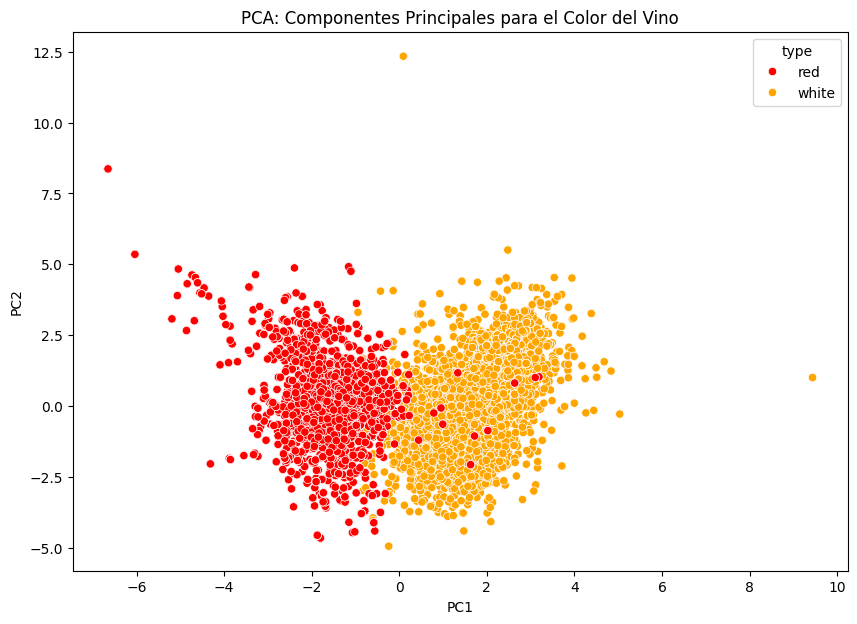

Varianza explicada por el primer componente: 0.30
Varianza explicada por el segundo componente: 0.21
                           PC1       PC2
fixed acidity        -0.274246  0.379741
volatile acidity     -0.373818 -0.062495
citric acid           0.108664  0.355620
residual sugar        0.313657  0.316688
chlorides            -0.322368  0.238594
free sulfur dioxide   0.415322  0.105469
total sulfur dioxide  0.465826  0.132454
density              -0.207565  0.498002
pH                   -0.200313 -0.327717
sulphates            -0.313358  0.162438
alcohol              -0.007151 -0.397176
Evaluación del modelo de Regresión Logística para predicción del tipo de vino
[[853 128]
 [385 594]]
              precision    recall  f1-score   support

         red       0.69      0.87      0.77       981
       white       0.82      0.61      0.70       979

    accuracy                           0.74      1960
   macro avg       0.76      0.74      0.73      1960
weighted avg       0.76      0.74 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Resumen inicial de los datos
print(df_wine.info())
print(df_wine.describe())

# Paso 2: Balanceo de los datos usando RandomOverSampler para igualar la cantidad de cada tipo de vino ('type')
ros = RandomOverSampler(random_state=42)
X = df_wine.drop(columns=['type', 'quality'])
y = df_wine['type']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_wine_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['type'])], axis=1)

# Visualización de la distribución de la variable 'tipo de vino' después del balanceo
sns.countplot(x='type', data=df_wine_resampled, hue='type', palette={'red': 'red', 'white': 'orange'})
plt.title('Distribución de Tipo de Vino (Balanceado)')
plt.show()

# Paso 3: Análisis exploratorio

# Relación entre alcohol y tipo de vino
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='alcohol', hue='type', data=df_wine_resampled, palette={'red': 'red', 'white': 'orange'})
plt.title('Relación entre Alcohol y Tipo de Vino')
plt.legend(title='Tipo de Vino')
plt.show()

# Relación entre pH y tipo de vino
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='pH', hue='type', data=df_wine_resampled, palette={'red': 'red', 'white': 'orange'})
plt.title('Relación entre pH y Tipo de Vino')
plt.legend(title='Tipo de Vino')
plt.show()

# Paso 4: PCA con los datos escalados

# Escalar los datos antes de realizar el PCA
features = df_wine_resampled.drop(columns=['type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['type'] = df_wine_resampled['type'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='type', data=pca_df, palette={'red': 'red', 'white': 'orange'})
plt.title('PCA: Componentes Principales para el Color del Vino')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')

# Paso 5: Selección de variables clave para el modelo

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)
print(loadings)

# Variables seleccionadas para los modelos (puedes ajustar según los resultados de PCA)
selected_features = ['alcohol', 'density', 'residual sugar']
# Variables para grafico
variables_claveC = ['alcohol', 'pH', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'sulphates']

# Paso 6: Entrenamiento y evaluación de modelos

# Dividir los datos balanceados para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_wine_resampled[selected_features], df_wine_resampled['type'], test_size=0.2, random_state=42)

X_trainC, X_testC, y_trainC, y_testC = train_test_split(df_wine_resampled[variables_claveC], df_wine_resampled['type'], test_size=0.2, random_state=42)


# Modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=10000, random_state=42)

logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

logreg_model.fit(X_trainC, y_trainC)
y_pred_logregC = logreg_model.predict(X_testC)

print("Evaluación del modelo de Regresión Logística para predicción del tipo de vino")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

print("Evaluación del modelo de Regresión Logística para predicción del tipo de vino con gráficos")
print(confusion_matrix(y_testC, y_pred_logregC))
print(classification_report(y_testC, y_pred_logregC))

# Modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_model.fit(X_trainC, y_trainC)
y_pred_rfC = rf_model.predict(X_testC)

print("Evaluación del modelo de Random Forest para predicción del tipo de vino")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("Evaluación del modelo de Random Forest para predicción del tipo de vino con gráficos")
print(confusion_matrix(y_testC, y_pred_rfC))
print(classification_report(y_testC, y_pred_rfC))


# **Balanceo en Ambos Sentidos (Calidad y Color del Vino)**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error

# Paso 1: Cargar y combinar datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Agregar una columna para identificar el tipo de vino
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combinar ambos datasets en uno solo
df_wine = pd.concat([df_red, df_white], axis=0)

# Resumen inicial de los datos
print(df_wine.info())
print(df_wine.describe())

# Paso 2: Balancear la calidad del vino
ros = RandomOverSampler(random_state=42)
X = df_wine.drop(columns=['quality'])  # Balanceamos solo en función de 'quality'
y = df_wine['quality']

X_resampled, y_resampled = ros.fit_resample(X, y)

# Crear un nuevo DataFrame con los datos balanceados
df_wine_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['quality'])], axis=1)

# Volver a agregar la columna 'type' ya que no debía ser parte del balanceo
df_wine_resampled['type'] = X_resampled['type'].iloc[:len(df_wine_resampled)].values

# Visualización de la distribución de la variable 'tipo de vino' después del balanceo
sns.countplot(x='type', data=df_wine_resampled, palette={'red': 'red', 'white': 'orange'})
plt.title('Distribución de Tipo de Vino (Balanceado)')
plt.show()

# Visualización de la distribución de la variable 'quality' después del balanceo
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=df_wine_resampled, palette={'red': 'red', 'white': 'orange'})
plt.title('Distribución de la Calidad por Tipo de Vino (Balanceado)')
plt.show()

# Paso 3: PCA para visualizar cómo se distribuyen los vinos en función de la calidad y el color

# Escalar los datos antes de realizar el PCA
features = df_wine_resampled.drop(columns=['quality', 'type'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['type'] = df_wine_resampled['type'].values
pca_df['quality'] = df_wine_resampled['quality'].values

# Visualizar los componentes principales
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='type', style='quality', data=pca_df, palette={'red': 'red', 'white': 'orange'})
plt.title('PCA: Componentes Principales por Calidad y Color del Vino')
plt.show()

# Mostrar la varianza explicada por cada componente
print(f'Varianza explicada por el primer componente: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Varianza explicada por el segundo componente: {pca.explained_variance_ratio_[1]:.2f}')

# Paso 4: Selección de variables clave para el modelo

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features.columns)
print(loadings)

# Variables seleccionadas para los modelos
selected_features = ['density','alcohol', 'chlorides', 'residual sugar', 'total sulfur dioxide']
variables_claveAll = ['alcohol', 'pH', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'sulphates']

# Paso 5: Entrenamiento y evaluación de modelos para predecir tanto la calidad como el color del vino

# Dividir los datos balanceados para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_wine_resampled[selected_features], df_wine_resampled[['quality', 'type']], test_size=0.2, random_state=42)

X_trainA, X_testA, y_trainA, y_testA = train_test_split(df_wine_resampled[variables_claveAll], df_wine_resampled[['quality', 'type']], test_size=0.2, random_state=42)

# Separar las predicciones de calidad y tipo
y_train_quality, y_train_type = y_train['quality'], y_train['type']
y_test_quality, y_test_type = y_test['quality'], y_test['type']

y_train_qualityA, y_train_typeA = y_trainA['quality'], y_trainA['type']
y_test_qualityA, y_test_typeA = y_testA['quality'], y_testA['type']

# Modelo de Regresión Logística para calidad
logreg_model_quality = LogisticRegression(max_iter=10000, random_state=42)

logreg_model_quality.fit(X_train, y_train_quality)
y_pred_logreg_quality = logreg_model_quality.predict(X_test)

logreg_model_quality.fit(X_trainA, y_train_qualityA)
y_pred_logreg_qualityA = logreg_model_quality.predict(X_testA)

print("Evaluación del modelo de Regresión Logística para predicción de la calidad del vino")
print(confusion_matrix(y_test_quality, y_pred_logreg_quality))
print(classification_report(y_test_quality, y_pred_logreg_quality))

print("Evaluación del modelo de Regresión Logística para predicción de la calidad del vino con gráficos")
print(confusion_matrix(y_test_qualityA, y_pred_logreg_qualityA))
print(classification_report(y_test_qualityA, y_pred_logreg_qualityA))

# Modelo de Regresión Logística para tipo de vino
logreg_model_type = LogisticRegression(max_iter=10000, random_state=42)

logreg_model_type.fit(X_train, y_train_type)
y_pred_logreg_type = logreg_model_type.predict(X_test)

logreg_model_type.fit(X_trainA, y_train_typeA)
y_pred_logreg_typeA = logreg_model_type.predict(X_testA)

print("Evaluación del modelo de Regresión Logística para predicción del tipo de vino")
print(confusion_matrix(y_test_type, y_pred_logreg_type))
print(classification_report(y_test_type, y_pred_logreg_type))

print("Evaluación del modelo de Regresión Logística para predicción del tipo de vino con gráficos")
print(confusion_matrix(y_test_typeA, y_pred_logreg_typeA))
print(classification_report(y_test_typeA, y_pred_logreg_typeA))

# Modelo Random Forest para calidad
rf_model_quality = RandomForestClassifier(random_state=42)

rf_model_quality.fit(X_train, y_train_quality)
y_pred_rf_quality = rf_model_quality.predict(X_test)

rf_model_quality.fit(X_trainA, y_train_qualityA)
y_pred_rf_qualityA = rf_model_quality.predict(X_testA)


print("Evaluación del modelo de Random Forest para predicción de la calidad del vino")
print(confusion_matrix(y_test_quality, y_pred_rf_quality))
print(classification_report(y_test_quality, y_pred_rf_quality))

print("Evaluación del modelo de Random Forest para predicción de la calidad del vino con gráficos")
print(confusion_matrix(y_test_qualityA, y_pred_rf_qualityA))
print(classification_report(y_test_qualityA, y_pred_rf_qualityA))

# Modelo Random Forest para tipo de vino
rf_model_type = RandomForestClassifier(random_state=42)

rf_model_type.fit(X_train, y_train_type)
y_pred_rf_type = rf_model_type.predict(X_test)

rf_model_type.fit(X_trainA, y_train_typeA)
y_pred_rf_typeA = rf_model_type.predict(X_testA)

print("Evaluación del modelo de Random Forest para predicción del tipo de vino")
print(confusion_matrix(y_test_type, y_pred_rf_type))
print(classification_report(y_test_type, y_pred_rf_type))

print("Evaluación del modelo de Random Forest para predicción del tipo de vino con gráficos")
print(confusion_matrix(y_test_typeA, y_pred_rf_typeA))
print(classification_report(y_test_typeA, y_pred_rf_typeA))


# Error cuadrático medio
mse_rf_quality = mean_squared_error(y_test_quality, y_pred_rf_quality)
mse_rf_qualityA = mean_squared_error(y_test_qualityA, y_pred_rf_qualityA)

label_encoder = LabelEncoder()
y_test_type_encoded = label_encoder.fit_transform(y_test_type)
y_pred_rf_type_encoded = label_encoder.transform(y_pred_rf_type)
y_test_typeA_encoded = label_encoder.transform(y_test_typeA)
y_pred_rf_typeA_encoded = label_encoder.transform(y_pred_rf_typeA)

mse_rf_type = mean_squared_error(y_test_type_encoded, y_pred_rf_type_encoded)
mse_rf_typeA = mean_squared_error(y_test_typeA_encoded, y_pred_rf_typeA_encoded)

print(f'MSE for Random Forest predicting wine quality (model): {mse_rf_quality}')
print(f'MSE for Random Forest predicting wine quality (model with graphs): {mse_rf_qualityA}')
print(f'MSE for Random Forest predicting wine type (model): {mse_rf_type}')
print(f'MSE for Random Forest predicting wine type (model with graphs): {mse_rf_typeA}')




MSE for Random Forest predicting wine quality (model): 0.09393099974817426
MSE for Random Forest predicting wine quality (model with graphs): 0.08184336439184084
MSE for Random Forest predicting wine type (model): 0.0017627801561319568
MSE for Random Forest predicting wine type (model with graphs): 0.0017627801561319568


# **Modelo de red secuencial**

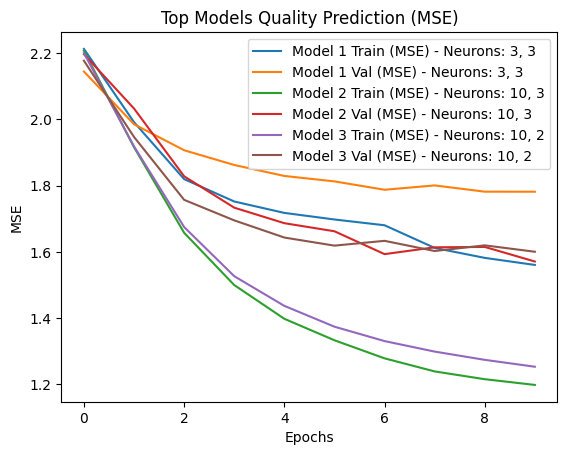

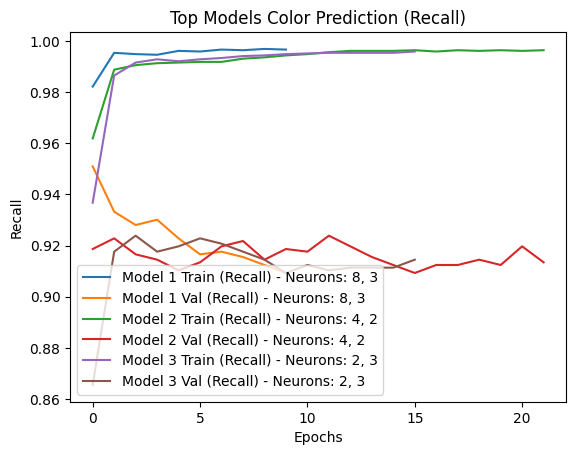

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# Load datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to identify wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine datasets
df_wine = pd.concat([df_red, df_white], axis=0)

# Prepare feature and target variables
X = df_wine.drop(columns=['quality', 'type'])
y_quality = df_wine['quality']
y_type = LabelEncoder().fit_transform(df_wine['type'])  # Encode 'red' as 0, 'white' as 1

# Train-test split
X_train, X_test, y_quality_train, y_quality_test, y_type_train, y_type_test = train_test_split(
    X, y_quality, y_type, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model parameters for iteration
neurons_range_1 = range(2, 11)  # Number of neurons in each layer
neurons_range_2 = range(2, 4)  # Number of neurons in each layer
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Track top models
top_models_quality = []
top_models_type = []

# Function to create quality model
def create_quality_model(neurons_1, neurons_2):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_1, activation='relu'))
    model.add(Dense(neurons_2, activation='relu'))  # Second layer
    model.add(Dense(10, activation='softmax', name='quality_output'))
    return model

# Function to create type model
def create_type_model(neurons_1, neurons_2):
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))
    model.add(Dense(neurons_1, activation='relu'))
    model.add(Dense(neurons_2, activation='relu'))  # Second layer
    model.add(Dense(1, activation='sigmoid', name='type_output'))
    return model

# Iterate through configurations for quality prediction
for neurons_1 in neurons_range_1:
    for neurons_2 in neurons_range_2:
            # Quality model with two hidden layers
            model_quality = create_quality_model(neurons_1, neurons_2)
            model_quality.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['mse'])
            history_quality = model_quality.fit(X_train_scaled, y_quality_train, validation_data=(X_test_scaled, y_quality_test),
                                                 epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
            mse_quality = model_quality.evaluate(X_test_scaled, y_quality_test, verbose=0)[1]
            top_models_quality.append((mse_quality, model_quality, history_quality, neurons_1, neurons_2))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled_type)  # Use the resampled features for scaling

# Iterate through configurations for color prediction
for neurons_1 in neurons_range_1:
    for neurons_2 in neurons_range_2:
            # Color model with two hidden layers
            model_type = create_type_model(neurons_1, neurons_2)
            model_type.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])
            history_type = model_type.fit(X_train_scaled, y_type_test, validation_data=(X_test_scaled, y_type_test),
                                           epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)
            recall_type = model_type.evaluate(X_test_scaled, y_type_test, verbose=0)[1]
            top_models_type.append((recall_type, model_type, history_type, neurons_1, neurons_2))

# Optionally sort and visualize the top models for quality prediction
top_models_quality = sorted(top_models_quality, key=lambda x: x[0])
for idx, (mse, model, history, neurons_1, neurons_2) in enumerate(top_models_quality[:3]):
    plt.plot(history.history['loss'], label=f'Model {idx + 1} Train (MSE) - Neurons: {neurons_1}, {neurons_2}')
    plt.plot(history.history['val_loss'], label=f'Model {idx + 1} Val (MSE) - Neurons: {neurons_1}, {neurons_2}')
plt.title("Top Models Quality Prediction (MSE)")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Optionally sort and visualize the top models for color prediction
top_models_type = sorted(top_models_type, key=lambda x: -x[0])
for idx, (recall, model, history, neurons_1, neurons_2) in enumerate(top_models_type[:3]):
    plt.plot(history.history['Recall'], label=f'Model {idx + 1} Train (Recall) - Neurons: {neurons_1}, {neurons_2}')
    plt.plot(history.history['val_Recall'], label=f'Model {idx + 1} Val (Recall) - Neurons: {neurons_1}, {neurons_2}')
plt.title("Top Models Color Prediction (Recall)")
plt.xlabel("Epochs")
plt.ylabel("Recall")
plt.legend()
plt.show()


# **Modelo Funcional**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import keras as k
from keras import layers
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import plot_model, to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping


# Step 1: Load and combine datasets
df_red = pd.read_csv('winequality-red.csv', sep=';')
df_white = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to identify the wine type
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine datasets
df_wine = pd.concat([df_red, df_white], axis=0)

# Variables used for prediction
variables_clave = ['alcohol', 'pH', 'volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'fixed acidity', 'sulphates']

# Encode type column
df_wine['type_encoded'] = df_wine['type'].map({'red': 0, 'white': 1})

# Shuffle data
data = df_wine.sample(frac=1, random_state=42)

# Prepare data for "type" prediction
X_type = data[variables_clave]
y_type = data['type_encoded']

# Split type data
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(
    X_type, y_type, test_size=0.2, random_state=42
)

# Prepare data for "quality" prediction
X_quality = data[variables_clave]
y_quality = data['quality'] - data['quality'].min()  # Normalize quality to start at 0

# Split quality data
X_quality_train, X_quality_test, y_quality_train, y_quality_test = train_test_split(
    X_quality, y_quality, test_size=0.2, stratify=y_quality, random_state=42
)

# Scale features
scaler = StandardScaler()
X_type_train = scaler.fit_transform(X_type_train)
X_type_test = scaler.transform(X_type_test)
X_quality_train = scaler.fit_transform(X_quality_train)
X_quality_test = scaler.transform(X_quality_test)

# Ensure targets are of float type
y_quality_train = y_quality_train.astype(float)
y_quality_test = y_quality_test.astype(float)

# Step 2: Define the combined model
entrada = k.Input(shape=(len(variables_clave),), name="Entrada")
capa_densa1 = layers.Dense(10, activation='relu', name='Capa_oculta1')(entrada)
salida_type = layers.Dense(1, activation='sigmoid', name='Salida_tipo')(capa_densa1)

combined_features = layers.Concatenate(name='Concatenador_tipo')([entrada, salida_type])
capa_densa2 = layers.Dense(15, activation='relu', name='Capa_oculta2')(combined_features)
capa_densa3 = layers.Dense(8, activation='relu', name='Capa_oculta3')(capa_densa2)
salida_quality = layers.Dense(7, activation='softmax', name='Salida_calidad')(capa_densa3)

# Create model
model_combined = k.Model(inputs=entrada, outputs=[salida_type, salida_quality])

# Early stopping callback
model_earlystop = k.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)

# Compile the model
model_combined.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss={
        'Salida_tipo': 'binary_crossentropy',
        'Salida_calidad': 'sparse_categorical_crossentropy'
    },
    metrics={
        'Salida_tipo': ['accuracy', 'Precision', 'Recall'],
        'Salida_calidad': ['accuracy']
    }
)

# Model summary and plot
model_combined.summary()
k.utils.plot_model(model_combined, show_shapes=True, show_layer_names=True, show_layer_activations=True)

# Step 3: Train the model
history_combined = model_combined.fit(
    x=X_type_train,
    y={
        'Salida_tipo': y_type_train,
        'Salida_calidad': y_quality_train
    },
    validation_data=(
        X_type_test,
        {
            'Salida_tipo': y_type_test,
            'Salida_calidad': y_quality_test
        }
    ),
    epochs=100,
    batch_size=10,
    callbacks=[model_earlystop]
)

# Display training results
print(history_combined.history)


# Pérdidas
plt.plot(history_combined.history['loss'], label='Total Loss (Train)')
plt.plot(history_combined.history['val_loss'], label='Total Loss (Validation)')
plt.legend()
plt.show()

plt.plot(history_combined.history['Salida_tipo_loss'], label='Type Loss (Train)')
plt.plot(history_combined.history['val_Salida_tipo_loss'], label='Type Loss (Validation)')
plt.legend()
plt.show()

plt.plot(history_combined.history['Salida_calidad_loss'], label='Quality Loss (Train)')
plt.plot(history_combined.history['val_Salida_calidad_loss'], label='Quality Loss (Validation)')
plt.legend()
plt.show()

# Tipos
plt.plot(history_combined.history['Salida_tipo_accuracy'], label='Type Accuracy (Train)')
plt.plot(history_combined.history['val_Salida_tipo_accuracy'], label='Type Accuracy (Validation)')
plt.legend()
plt.show()

plt.plot(history_combined.history['Salida_tipo_precision'], label='Type Precision (Train)')
plt.plot(history_combined.history['val_Salida_tipo_precision'], label='Type Precision (Validation)')
plt.legend()
plt.show()

plt.plot(history_combined.history['Salida_tipo_recall'], label='Type Recall (Train)')
plt.plot(history_combined.history['val_Salida_tipo_recall'], label='Type Recall (Validation)')
plt.legend()
plt.show()

y_type_pred = (model_combined.predict(X_test_scaled)[0] > 0.5).astype(int).flatten()

cm = confusion_matrix(y_type_test, y_type_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Red', 'White'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Type Prediction")
plt.show()

# Calidad
plt.plot(history_combined.history['Salida_calidad_accuracy'], label='Quality Accuracy (Train)')
plt.plot(history_combined.history['val_Salida_calidad_accuracy'], label='Quality Accuracy (Validation)')
plt.legend()
plt.show()

print("capa_densa1 shape:", capa_densa1.shape)  # Should be (None, 10)
print("capa_densa2 shape:", capa_densa2.shape)  # Should be (None, 5)
print("salida_type_transformed shape:", salida_type_transformed.shape)  # Should be (None, 5)
print("jumpforward shape:", jumpforward.shape)  # Should be (None, 20)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Entrada (InputLayer)      │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_oculta1 (Dense)      │ (None, 10)             │             90 │ Entrada[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Salida_tipo (Dense)       │ (None, 1)              │             11 │ Capa_oculta1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Concatenador_tipo         │ (None, 9)              │              0 │ Entrada[0][0],         │
│ (Concatenate)             │                        │                │ Salida_tipo[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_oculta2 (Dense)      │ (None, 15)             │            150 │ Concatenador_tipo[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Capa_oculta3 (Dense)      │ (None, 8)              │            128 │ Capa_oculta2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Salida_calidad (Dense)    │ (None, 7)              │             63 │ Capa_oculta3[0][0]     │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 442 (1.73 KB)

 Trainable params: 442 (1.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 7)